# Data Presentation

Original Question: <br>
Is regular season series record indicative of postseason success?

### Import

In [85]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup, NavigableString
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator 

import plotly.graph_objects as go
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.io as pio

import chart_studio
import streamlit as st


### Set directory/read in csv's

In [86]:
workingdf = pd.read_csv('LeagueGameResults.csv')
workingdf['Winner'] = np.where(workingdf['Home_Team_Score'] > workingdf['Away_Team_Score'] , workingdf['Home_Team'], workingdf['Away_Team'])
workingdf['Date'] = pd.to_datetime(workingdf["Date"])
workingdf['Season'] = pd.DatetimeIndex(workingdf['Date']).year

PostSeasonMarkerDF = pd.read_csv('PostSeasonStartDates.csv')
PostSeasonMarkerDF = PostSeasonMarkerDF.set_index('Season')

MasterYearlyResults = pd.read_csv('YearlyResultsMaster.csv')

WSChampsDF = pd.read_csv('WSChamps.csv')


In [87]:
workingdf

Home_Team  Home_Team_Score              Away_Team  \
0         Boston Beaneaters             17.0  Philadelphia Phillies   
1           Cincinnati Reds             10.0        Chicago Orphans   
2           New York Giants              2.0      Brooklyn Superbas   
3       St. Louis Cardinals              3.0     Pittsburgh Pirates   
4           New York Giants             12.0      Brooklyn Superbas   
...                     ...              ...                    ...   
205360       Houston Astros              7.0         Atlanta Braves   
205361       Atlanta Braves              2.0         Houston Astros   
205362       Atlanta Braves              3.0         Houston Astros   
205363       Atlanta Braves              5.0         Houston Astros   
205364       Houston Astros              0.0         Atlanta Braves   

        Away_Team_Score       Date                 Winner  Season  
0                  19.0 1900-04-19  Philadelphia Phillies    1900  
1                  13.0 1900-04-19        Chicago Orphans    1900  
2                   3.0 1900-04-19      Brooklyn Superbas    1900  
3                   0.0 1900-04-19    St. Louis Cardinals    1900  
4                   8.0 1900-04-20        New York Giants    1900  
...                 ...        ...                    ...     ...  
205360              2.0 2021-10-27         Houston Astros    2021  
205361              0.0 2021-10-29         Atlanta Braves    2021  
205362              2.0 2021-10-30         Atlanta Braves    2021  
205363              9.0 2021-10-31         Houston Astros    2021  
205364              7.0 2021-11-02         Atlanta Braves    2021  

[205365 rows x 7 columns]

In [88]:
PostSeasonMarkerDF

PostSeasonStartDate
Season                    
1905            1905-10-09
1906            1906-10-09
1907            1907-10-08
1908            1908-10-10
1909            1909-10-08
...                    ...
2017            2017-10-03
2018            2018-10-02
2019            2019-10-01
2020            2020-09-29
2021            2021-10-05

[116 rows x 1 columns]

In [89]:
MasterYearlyResults['WinPercent'] = MasterYearlyResults ['Wins']/ MasterYearlyResults ['NumberOfGames']
MasterYearlyResults['SeriesWinPercent'] = MasterYearlyResults ['SeriesWins']/ MasterYearlyResults ['NumberOfSeries']


In [90]:
MasterYearlyResults

Unnamed: 0                 Team  Year  NumberOfGames  Wins  Losses  \
0              0       Anaheim Angels  1997            162    84      78   
1              1       Anaheim Angels  1998            162    85      77   
2              2       Anaheim Angels  1999            162    70      92   
3              3       Anaheim Angels  2000            162    82      80   
4              4       Anaheim Angels  2001            162    75      87   
...          ...                  ...   ...            ...   ...     ...   
2605        2605  Washington Senators  1967            161    76      85   
2606        2606  Washington Senators  1968            161    65      96   
2607        2607  Washington Senators  1969            162    86      76   
2608        2608  Washington Senators  1970            162    70      92   
2609        2609  Washington Senators  1971            159    64      95   

      NumberOfSeries  SeriesWins  SeriesLosses  SeriesTies  WinPercent  \
0                 60          23            21          16    0.518519   
1                 58          25            20          13    0.524691   
2                 52          19            29           4    0.432099   
3                 52          21            20          11    0.506173   
4                 53          24            27           2    0.462963   
...              ...         ...           ...         ...         ...   
2605              55          18            24          13    0.472050   
2606              55          15            27          13    0.403727   
2607              54          26            19           9    0.530864   
2608              55          20            28           7    0.432099   
2609              55          19            27           9    0.402516   

      SeriesWinPercent  
0             0.383333  
1             0.431034  
2             0.365385  
3             0.403846  
4             0.452830  
...                ...  
2605          0.327273  
2606          0.272727  
2607          0.481481  
2608          0.363636  
2609          0.345455  

[2610 rows x 12 columns]

In [91]:
WSChampsDF

Year               AL Winner  Wins  Wins.1             NL Winner  \
0    2020          Tampa Bay Rays     2       4   Los Angeles Dodgers   
1    2019          Houston Astros     3       4  Washington Nationals   
2    2018          Boston Red Sox     4       1   Los Angeles Dodgers   
3    2017          Houston Astros     4       3   Los Angeles Dodgers   
4    2016       Cleveland Indians     3       4          Chicago Cubs   
..    ...                     ...   ...     ...                   ...   
111  1908          Detroit Tigers     1       4          Chicago Cubs   
112  1907          Detroit Tigers     0       4          Chicago Cubs   
113  1906       Chicago White Sox     4       2          Chicago Cubs   
114  1905  Philadelphia Athletics     1       4       New York Giants   
115  1903        Boston Americans     5       3    Pittsburgh Pirates   

            Series MVP  
0         Corey Seager  
1    Stephen Strasburg  
2         Steve Pearce  
3      George Springer  
4          Ben Zobrist  
..                 ...  
111                NaN  
112                NaN  
113                NaN  
114                NaN  
115                NaN  

[116 rows x 6 columns]

In [114]:
TeamsAndYears = pd.DataFrame(workingdf.groupby(by=["Home_Team"]).agg({'Season': ['min', 'max']}).to_records())
TeamsAndYears = TeamsAndYears.rename(columns = {"('Season', 'min')": 'Season_Min', 
                               "('Season', 'max')": 'Season_Max', 'Home_Team': 'Team'})
TeamsAndYears

Team  Season_Min  Season_Max
0         Anaheim Angels        1997        2004
1   Arizona Diamondbacks        1998        2021
2         Atlanta Braves        1966        2021
3      Baltimore Orioles        1901        2021
4    Baltimore Terrapins        1914        1915
..                   ...         ...         ...
65        Tampa Bay Rays        2008        2021
66         Texas Rangers        1972        2021
67     Toronto Blue Jays        1977        2021
68  Washington Nationals        2005        2021
69   Washington Senators        1901        1971

[70 rows x 3 columns]

In [93]:
TeamsAndYearsFull = pd.DataFrame(workingdf.groupby(by=["Home_Team", "Season"]).agg({'Season': ['max']}).to_records())
TeamsAndYearsFull = TeamsAndYearsFull.rename(columns={'Home_Team': 'Team'})
Team = 'New York Mets'
min(list(TeamsAndYearsFull[TeamsAndYearsFull['Team'] == Team].Season))


1962

In [94]:

currentTeams = ['Cincinnati Reds',  'Pittsburgh Pirates', 'Philadelphia Phillies',
                'Chicago White Sox', 'Detroit Tigers', 'Baltimore Orioles', 
                'Milwaukee Brewers', 'Chicago Cubs',  'Boston Red Sox', 
                'New York Yankees', 'Cleveland Indians', 'San Francisco Giants', 
                'Los Angeles Dodgers', 'Minnesota Twins', 'New York Mets', 
                'Houston Astros',  'Atlanta Braves', 'Oakland Athletics', 
                'Kansas City Royals', 'San Diego Padres', 'Texas Rangers', 
                'Seattle Mariners', 'Toronto Blue Jays',  'Los Angeles Angels',
                'Colorado Rockies',  'Arizona Diamondbacks', 'St. Louis Cardinals',
                'Washington Nationals', 'Tampa Bay Rays', 'Miami Marlins']

oldTeams = ['Boston Beaneaters', 'Brooklyn Superbas', 'New York Giants',   
            'Chicago Orphans', 'Philadelphia Athletics', 'Cleveland Blues', 
            'Washington Senators', 'Boston Americans', 'St. Louis Browns',
            'Cleveland Bronchos', 'Cleveland Naps', 'New York Highlanders', 
            'Boston Doves', 'Boston Rustlers', 'Brooklyn Dodgers', 
            'Boston Braves', 'Baltimore Terrapins', 'Brooklyn Robins',
            'Pittsburgh Rebels', 'Kansas City Packers', 'St. Louis Terriers',
            'Chicago Chi-Feds', 'Indianapolis Hoosiers', 'Brooklyn Tip-Tops',
            'Buffalo Buffeds', 'Chicago Whales', 'Newark Pepper',
            'Buffalo Blues', 'Boston Bees', 'Milwaukee Braves', 'LA Angels of Anaheim',
            'Cincinnati Redlegs', 'Kansas City Athletics',  
            'Houston Colt .45s', 'California Angels', 'Seattle Pilots', 'Florida Marlins' 
            'Montreal Expos', 'Anaheim Angels', 'Tampa Bay Devil Rays']

teams_dictionary= {'Tamba Bay Rays': ['Tampa Bay Devil Rays', 'Tampa Bay Rays'], 'Miami Marlins':['Florida Marlins', 'Miami Marlins',],
                  'Washington Nationals':['Montreal Expos', 'Washington Nationals'], 'Milwaukee Brewers': ['Seattle Pilots', 'Milwaukee Brewers'],
                  'Houston Astros': ['Houston Colt .45s', 'Houston Astros',], 'Minnesota Twins':['Washington Senators', 'Minnesota Twins'],
                  'Los Angeles Angels': ['California Angels','Anaheim Angels', 'LA Angels of Anaheim', 'Los Angeles Angels' ], 
                  'Oakland Athletics': ['Philadelphia Athletics', 'Kansas City Athletics', 'Oakland Athletics'], 
                  'Baltimore Orioles': ['Baltimore Orioles','St. Louis Browns'], 'Cleveland Indians': ['Cleveland Indians', 'Cleveland Naps', 'Cleveland Blues'],
                  'Boston Red Sox': ['Boston Red Sox', 'Boston Americans'], 'Cincinnati Reds': ['Cincinnati Reds','Cincinnati Redlegs'],
                  'New York Yankees': ['New York Yankees', 'New York Highlanders'], 'Chicago Cubs': ['Chicago Cubs','Chicago Orphans'],
                  'Los Angeles Dodgers': ['Los Angeles Dodgers', 'Brooklyn Superbas','Brooklyn Dodgers', 'Brooklyn Robins'],
                  'San Francisco Giants': ['San Francisco Giants', 'New York Giants'], 'New York Mets': ['New York Mets'],
                  'Atlanta Braves': ['Atlanta Braves','Milwaukee Braves', 'Boston Braves', 'Boston Doves', 
                                     'Boston Beaneaters', 'Boston Bees', 'Boston Rustlers' ], 
                   'Pittsburgh Pirates':['Pittsburgh Pirates'], 'Philadelphia Phillies':['Philadelphia Phillies'],
                   'Chicago White Sox': ['Chicago White Sox'], 'Detroit Tigers': ['Detroit Tigers'], 'Texas Rangers': ['Texas Rangers'],
                   'Kansas City Royals': ['Kansas City Royals'], 'San Diego Padres': ['San Diego Padres'], 
                   'Arizona Diamondbacks': ['Arizona Diamondbacks'], 'Seattle Mariners':['Seattle Mariners'], 
                   'Toronto Blue Jays': ['Toronto Blue Jays'], 'Colorado Rockies':['Colorado Rockies'], 'St. Louis Cardinals':['St. Louis Cardinals']
                  }
    
#

In [95]:
Team = 'Oakland Athletics'
team_names = teams_dictionary[Team]
for x in range(len(team_names)):
    print(team_names[x])

Philadelphia Athletics
Kansas City Athletics
Oakland Athletics


In [129]:
Team_option_1 = 'New York Mets'

In [133]:
Year_list = MasterYearlyResults[MasterYearlyResults['Team'] == Team_option_1].Year
type(Year_list)

pandas.core.series.Series

### Define Functions

In [126]:
def getTeamAndYears(Team, start_year = None, end_year = None, historical_results = True, AsHelperFunction = False, plot = True):
    
    TeamInQuotes= "'" + Team + "'"
    query = "Team == " + TeamInQuotes
    Results = MasterYearlyResults.query(query)
    
    if start_year == None:
        start_year = Results['Year'].iloc[0]
    
    if end_year == None:
        end_year = Results['Year'].iloc[-1]
    
    Results = Results[Results['Year'] >= start_year]
    Results = Results[Results['Year'] <= end_year]

    
    Results = Results.reset_index()
    Results = Results.drop(columns = ['index', 'Unnamed: 0'])
    

    
    total_row = [ 'Total:', Results.Year.count(), Results.NumberOfGames.sum(),  Results.Wins.sum(),  Results.Losses.sum(),
                Results.NumberOfSeries.sum(), Results.SeriesWins.sum(),  Results.SeriesLosses.sum(),
                Results.SeriesTies.sum(), (Results.Wins.sum()/Results.NumberOfGames.sum()),
                (Results.SeriesWins.sum()/Results.NumberOfSeries.sum())]
                

    if start_year != end_year and plot == True: 
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=Results.Year, y=Results.SeriesWinPercent,
                mode='lines',
                name='Series Win Percent'))
        fig.add_trace(go.Scatter(x=Results.Year, y=Results.WinPercent,
                mode='lines',
                name='Win Percent',
                line_color = '#2ca02c'))
        fig.add_hline(y=0.5, line_color = 'Red')
        fig.update_yaxes(range = [.2,.8])  
        fig.show()
    

    Results.loc['Total:'] = total_row
    
    Results['WinPercent'] = Results['WinPercent'].round(decimals = 3)
    Results['SeriesWinPercent'] = Results['SeriesWinPercent'].round(decimals = 3) 
    

    
    if AsHelperFunction == False:
        table = ff.create_table(Results)
        table.update_layout(width=1500, height=1500)
    
        return table
    
    else:
        return Results
    

In [122]:
option = 'New York Mets'
start = TeamsAndYears[TeamsAndYears.Team == option].Season_Min.iloc[0]
end = TeamsAndYears[TeamsAndYears.Team == option].Season_Max.iloc[0]

In [125]:
type(end)

numpy.int64

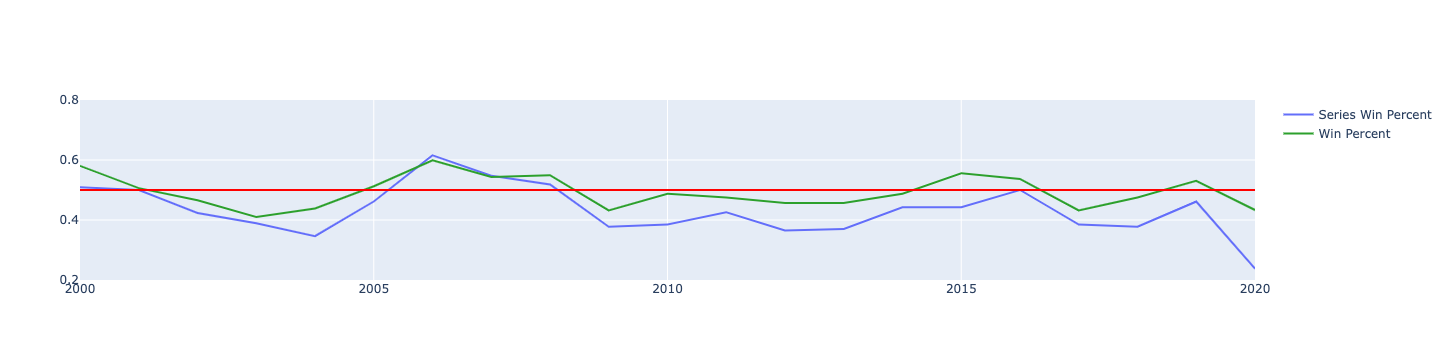

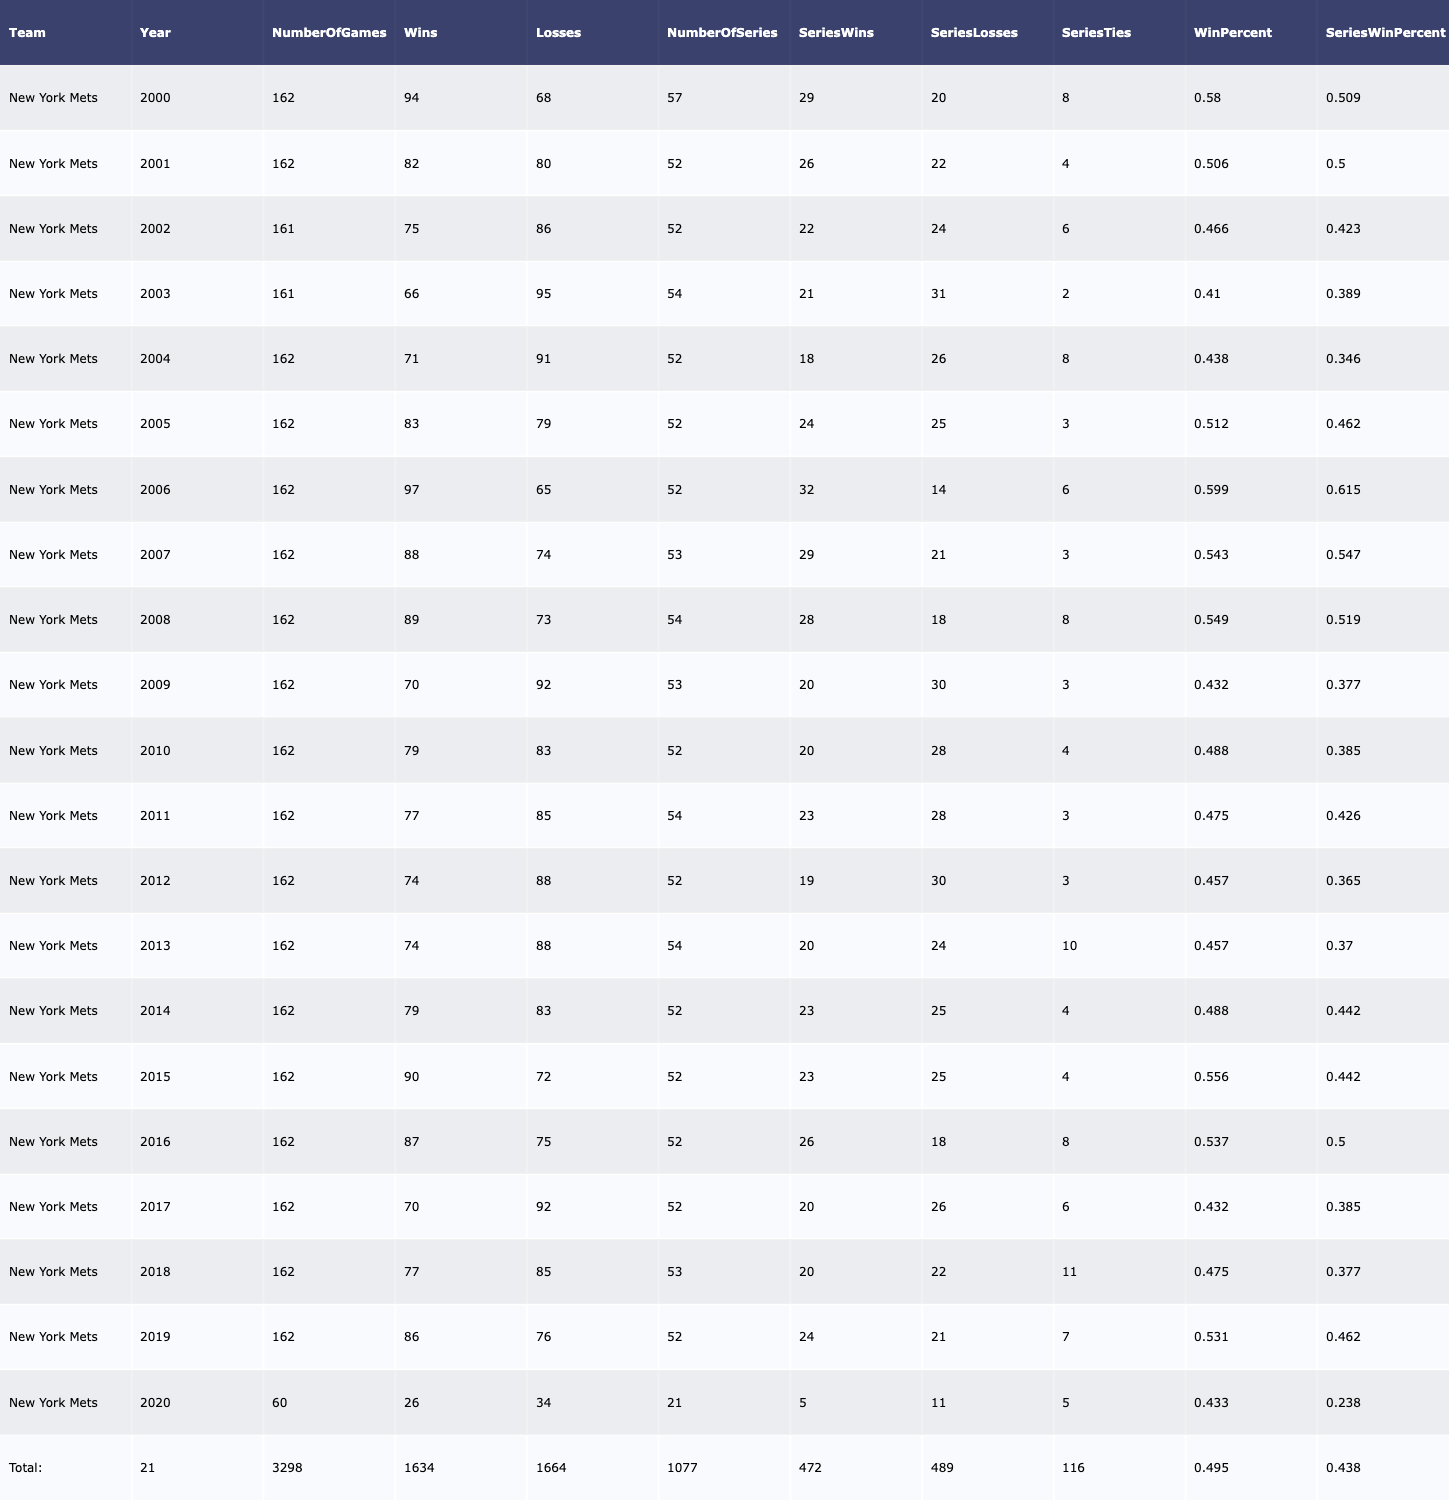

In [127]:
getTeamAndYears('New York Mets', 2000, 2020)

In [98]:
def getTeamAndYearsMultiName(Team, start_year = None, end_year = None, historical_results = True, AsHelperFunction = False, plot = True):
    
    Results = pd.DataFrame()
    team_names = teams_dictionary[Team]
    appended_data = []
    for team in team_names:
        Team = team
    
        TeamInQuotes= "'" + Team + "'"
        query = "Team == " + TeamInQuotes
        result = MasterYearlyResults.query(query)
        
    
        if start_year == None:
            start_year = result['Year'].iloc[0]
    
        if end_year == None:
            
            end_year = result['Year'].iloc[-1]
        
        
        result = result[result['Year'] >= start_year]
        result = result[result['Year'] <= end_year]
          
        result = result.reset_index()
        result = result.drop(columns = ['index', 'Unnamed: 0'])
        
        
        Results = Results.append(result, True)
        
        start_year = None
        end_year = None
    
    
    total_row = [ 'Total:', '-', Results.NumberOfGames.sum(),  Results.Wins.sum(),  Results.Losses.sum(),
                Results.NumberOfSeries.sum(), Results.SeriesWins.sum(),  Results.SeriesLosses.sum(),
                Results.SeriesTies.sum(), (Results.Wins.sum()/Results.NumberOfGames.sum()),
                (Results.SeriesWins.sum()/Results.NumberOfSeries.sum())]
                

    #if start_year != end_year and plot == True: 
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=Results.Year, y=Results.SeriesWinPercent,
            mode='lines',
            name='Series Win Percent'))
    fig.add_trace(go.Scatter(x=Results.Year, y=Results.WinPercent,
                mode='lines',
                name='Win Percent',
                line_color = '#2ca02c'))
    fig.add_hline(y=0.5, line_color = 'Red')
    fig.update_yaxes(range = [.2,.8])  
    fig.show()
    

    Results.loc['Total:'] = total_row
    
    Results['WinPercent'] = Results['WinPercent'].round(decimals = 3)
    Results['SeriesWinPercent'] = Results['SeriesWinPercent'].round(decimals = 3) 
    
    if AsHelperFunction == False:
        table = ff.create_table(Results)
    
        return table
    
    else:
        return Results
    

In [26]:
def getSeasonHelperFunction(Team, Year):
    TeamInQuotes= "'" + Team + "'"
    query1 = "Home_Team == " + TeamInQuotes + " | Away_Team == " + TeamInQuotes

    df1 = workingdf.query(query1)
    df1 = df1.reset_index()

    query2 = "Season == " + str(Year)
    df1 = df1.query(query2)
    
    return df1

In [27]:
def getOneYearResultsFull(Team, Year, plot = True):
    
    df = getOneYearRegularSeason(Team, Year, Plot=plot, AsHelper = True)
    playoff_df = getOneYearPlayoffs(Team, Year, AsHelper = True)
    
       
    if len(playoff_df) == 0:
        final_row = ['-', '-', 'Did', 'Not', 'Make', 'Playoffs', '-', '-', '-']
        df.loc['-'] = final_row
    else:
        spacer_row = ['-', '-', 'Playoff', '-', 'Results', '-', '-', '-', '-']
        df.loc['-'] = spacer_row
        df = pd.concat([df, playoff_df], ignore_index=False)
        
    table = ff.create_table(df)
    
    return table

In [28]:
def regSeasonBarCharts(df, Year):
    df2 = pd.DataFrame(
    dict(
        year=[Year, Year] * 3,
        layout=["Record", "Series Record"] * 3,
        response=["Win Percent", "Tie Percent", 'Loss Percent'] * 2,
        cnt=[df.WinPercent.iloc[-1], df.SeriesTiePercent.iloc[-1], df.LossPercent.iloc[-1],
        df.SeriesWinPercent.iloc[-1], 0, df.SeriesLossPercent.iloc[-1] ],
        response2=["Wins", "Ties", 'Losses'] * 2,
        cnt2=[df.Wins.iloc[-1], df.SeriesTies.iloc[-1], df.Losses.iloc[-1],
        df.SeriesWins.iloc[-1], 0, df.SeriesLosses.iloc[-1] ]
        ))
        
    
    
    fig1 = go.Figure()
    fig2 = go.Figure()
    
    fig1.update_layout(
    template="simple_white",
    xaxis=dict(title_text="Regular Season Results "),
    yaxis=dict(title_text="Percent"),
    barmode="stack",
    )
    
    fig2.update_layout(
    template="simple_white",
    xaxis=dict(title_text="Regular Season Results "),
    yaxis=dict(title_text="Count"),
    barmode="stack",
    )
    
    colors = ["#636EFA", '#BAB0AC', "#EF553B" ]

    for r, c in zip(df2.response.unique(), colors):
        plot_df2 = df2[df2.response == r]
        fig1.add_trace(
        go.Bar(x=[plot_df2.year, plot_df2.layout], y=plot_df2.cnt, name=r , marker_color=c),
            )
        
    for r, c in zip(df2.response2.unique(), colors):
        plot_df2 = df2[df2.response2 == r]
        fig2.add_trace(
        go.Bar(x=[plot_df2.year, plot_df2.layout], y=plot_df2.cnt2, name=r , marker_color=c),
            )

      
    fig1.show()
    fig2.show()

In [ ]:
### Steamlit copy
def getBarChart1(Team, Year):
    df = getTeamAndYears(Team, Year, Year, AsHelperFunction = True)
    
    df['SeriesTiePercent'] = df.SeriesTies/Result.NumberOfSeries
    df['SeriesLossPercent']= df.SeriesLosses/Result.NumberOfSeries
    df['LossPercent'] = df.Losses/Result.NumberOfGames
    
    df2 = pd.DataFrame(
    dict(
        year=[Year, Year] * 3,
        layout=["Record", "Series Record"] * 3,
        response=["Win Percent", "Tie Percent", 'Loss Percent'] * 2,
        cnt=[df.WinPercent.iloc[-1], df.SeriesTiePercent.iloc[-1], df.LossPercent.iloc[-1],
        df.SeriesWinPercent.iloc[-1], 0, df.SeriesLossPercent.iloc[-1] ],
        response2=["Wins", "Ties", 'Losses'] * 2,
        cnt2=[df.Wins.iloc[-1], df.SeriesTies.iloc[-1], df.Losses.iloc[-1],
        df.SeriesWins.iloc[-1], 0, df.SeriesLosses.iloc[-1] ]
        ))
        
    
    
    fig = go.Figure()
    
    
    fig.update_layout(
    template="simple_white",
    xaxis=dict(title_text="Regular Season Results "),
    yaxis=dict(title_text="Percent"),
    barmode="stack",
    )
    

    
    colors = ["#636EFA", '#BAB0AC', "#EF553B" ]

    for r, c in zip(df2.response.unique(), colors):
        plot_df2 = df2[df2.response == r]
        fig.add_trace(
        go.Bar(x=[plot_df2.year, plot_df2.layout], y=plot_df2.cnt, name=r , marker_color=c),
            )
        

    return fig

      

    
def getBarChart2(Team, Year):
    df = getTeamAndYears(Team, Year, Year, AsHelperFunction = True)
    
    df['SeriesTiePercent'] = df.SeriesTies/Result.NumberOfSeries
    df['SeriesLossPercent']= df.SeriesLosses/Result.NumberOfSeries
    df['LossPercent'] = df.Losses/Result.NumberOfGames
    
    df2 = pd.DataFrame(
    dict(
        year=[Year, Year] * 3,
        layout=["Record", "Series Record"] * 3,
        response=["Win Percent", "Tie Percent", 'Loss Percent'] * 2,
        cnt=[df.WinPercent.iloc[-1], df.SeriesTiePercent.iloc[-1], df.LossPercent.iloc[-1],
        df.SeriesWinPercent.iloc[-1], 0, df.SeriesLossPercent.iloc[-1] ],
        response2=["Wins", "Ties", 'Losses'] * 2,
        cnt2=[df.Wins.iloc[-1], df.SeriesTies.iloc[-1], df.Losses.iloc[-1],
        df.SeriesWins.iloc[-1], 0, df.SeriesLosses.iloc[-1] ]
        ))
    
    fig = go.Figure()
    
    fig.update_layout(
    template="simple_white",
    xaxis=dict(title_text="Regular Season Results "),
    yaxis=dict(title_text="Count"),
    barmode="stack",
    )
    
    colors = ["#636EFA", '#BAB0AC', "#EF553B" ]
        
    for r, c in zip(df2.response2.unique(), colors):
        plot_df2 = df2[df2.response2 == r]
        fig.add_trace(
        go.Bar(x=[plot_df2.year, plot_df2.layout], y=plot_df2.cnt2, name=r , marker_color=c),
            )
        
    return fig

In [136]:
type(TeamsAndYears.Team)

pandas.core.series.Series

In [29]:
def getOneYearRegularSeason(Team, Year, Plot = True, AsHelper = False):
    
    if Team not in currentTeams and Team not in oldTeams:
        print('Invalid Team Name. Please Try Again')
        

    else:
    
        df = getSeasonHelperFunction(Team, Year)
        
        if len(df) == 0:
            print('Invalid Year for Team Given. Please Try Again')
            
        else: 
    
            Result = getTeamAndYears(Team, Year, Year, AsHelperFunction = True)
    
            Result['SeriesTiePercent'] = Result.SeriesTies/Result.NumberOfSeries
            Result['SeriesLossPercent']= Result.SeriesLosses/Result.NumberOfSeries
            Result['LossPercent'] = Result.Losses/Result.NumberOfGames
    
            noPostSeasonList = [1900, 1901, 1902, 1903, 1904, 1994]
            if Year not in noPostSeasonList:
                postSeasonCheck = PostSeasonMarkerDF.loc[Year][0]
                playoff_df = df[df.Date >= postSeasonCheck]
                df = df[df.Date < postSeasonCheck]
        
     
            df = df.reset_index()    
            df.index = np.arange(1, len(df)+1)
    
            
            df['Team_Winner'] = df['Winner'] == Team
            df['Cumultive_Wins'] = df['Team_Winner'].cumsum()
            df['WinPercent'] = df['Cumultive_Wins']/df.index

    
            df = df.drop(columns = ['index', 'level_0'])
    

            if Plot == True:
                regSeasonBarCharts(Result, Year)
                
            
                fig3 = go.Figure()
                fig3.add_trace(go.Scatter(x=df.Date, y=df.WinPercent,
                    mode='lines',
                    name='Win Percent'))
                fig3.add_hline(y=0.5, line_color = 'Red')
                fig3.update_yaxes(range = [.1,.9], title = 'Win Percentage')
                fig3.show()
            
 
            
            df['WinPercent'] = df['WinPercent'].round(decimals = 3)
            df = df.drop(columns = 'Season')
            
            
            df.Date = pd.DatetimeIndex(df.Date).strftime("%m-%d-%Y")
            if AsHelper == False:
                table = ff.create_table(df)
                return table
            else: return df

In [ ]:
def getOneYearPlot(Team, Year):
    df = getSeasonHelperFunction(Team, Year)
    
    df = df.reset_index()    
    df.index = np.arange(1, len(df)+1)        
    df['Team_Winner'] = df['Winner'] == Team
    df['Cumultive_Wins'] = df['Team_Winner'].cumsum()
    df['WinPercent'] = df['Cumultive_Wins']/df.index
    df = df.drop(columns = ['index', 'level_0'])
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=df.Date, y=df.WinPercent, mode='lines', name='Win Percent'))
    fig.add_hline(y=0.5, line_color = 'Red')
    fig.update_yaxes(range = [.1,.9], title = 'Win Percentage')
    return fig
            

In [30]:
def getOneYearPlayoffs(Team, Year, AsHelper = False):
    
    playoff_df = getSeasonHelperFunction(Team, Year)
       
    noPostSeasonList = [1900, 1901, 1902, 1903, 1904, 1994]
    if Year not in noPostSeasonList:
        postSeasonCheck = PostSeasonMarkerDF.loc[Year][0]
        playoff_df = playoff_df[playoff_df.Date >= postSeasonCheck]
    else: 
        postSeasonCheck = '2099-01-01'
        playoff_df = playoff_df[playoff_df.Date >= postSeasonCheck]
        print('No Playoffs in year selected')
           
    if len(playoff_df) == 0:
        if AsHelper == True:
            return playoff_df
        else:
            print("Team Did Not Qualify for Playoffs in Year Provided")

    else:
        
        playoff_df = playoff_df.reset_index()    
        playoff_df.index = np.arange(1, len(playoff_df)+1)
    
        playoff_df['Team_Winner'] = playoff_df['Winner'] == Team
        playoff_df['Cumultive_Wins'] = playoff_df['Team_Winner'].cumsum()
        playoff_df['WinPercent'] = playoff_df['Cumultive_Wins']/playoff_df.index
        playoff_df.Date = pd.DatetimeIndex(playoff_df.Date).strftime("%m-%d-%Y")
        
        playoff_df['WinPercent'] = playoff_df['WinPercent'].round(decimals = 3)
        playoff_df = playoff_df.drop(columns = ['index', 'level_0', 'Season'])
    
        if playoff_df.Team_Winner.iloc[-1] == True:
                
            final_row = ['-', '-', 'Won', 'World', 'Series', '!', '!', '!', '-']
        else: 
            final_row = ['Elimainated', 'in', 'Playoffs','-', '-', '-', '-', '-', '-']
        playoff_df.loc['--'] = final_row
        
        #playoff_df.Date = pd.DatetimeIndex(playoff_df.Date).strftime("%m-%d-%Y")
        
        if AsHelper == False:
            table = ff.create_table(playoff_df)
    
            return table
    
        else:
            return playoff_df
    

In [31]:
def madePlayoffs(Team, Year):
     
    df = getOneYearPlayoffs(Team, Year, AsHelper = True)
        
    if len(df) != 0:
        return True
    else:
        return False


In [32]:
def wonWorldSeries(Team, Year):
     
    df = getOneYearPlayoffs(Team, Year, AsHelper = True)
        
    if len(df) == 0:
        return False
    else:
        if df.Team_Winner.iloc[-2] == True:
            return True
        else:
            return False

### Test Functions

#### getTeamsAndYears

In [ ]:
#getTeamAndYears('Los Angeles Angels')
#Need more robust way to deal with teams and continuity

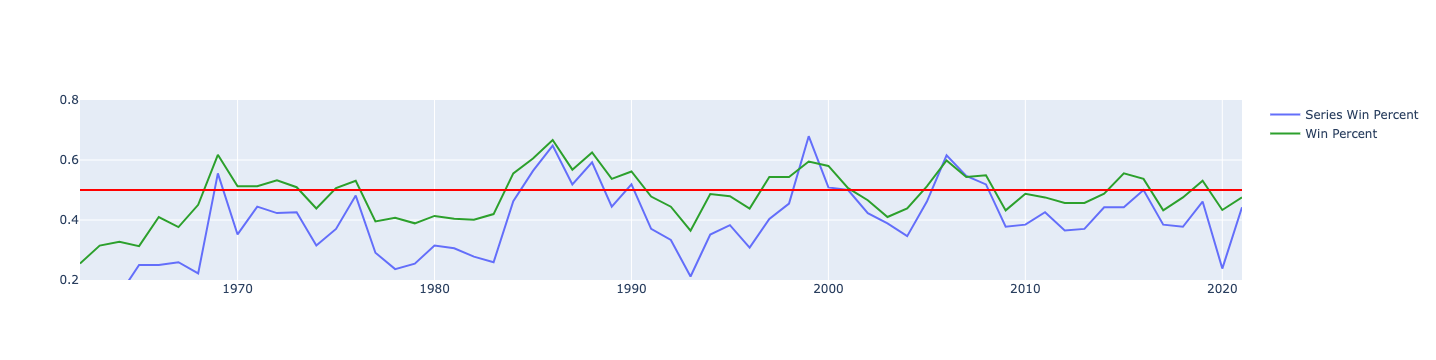

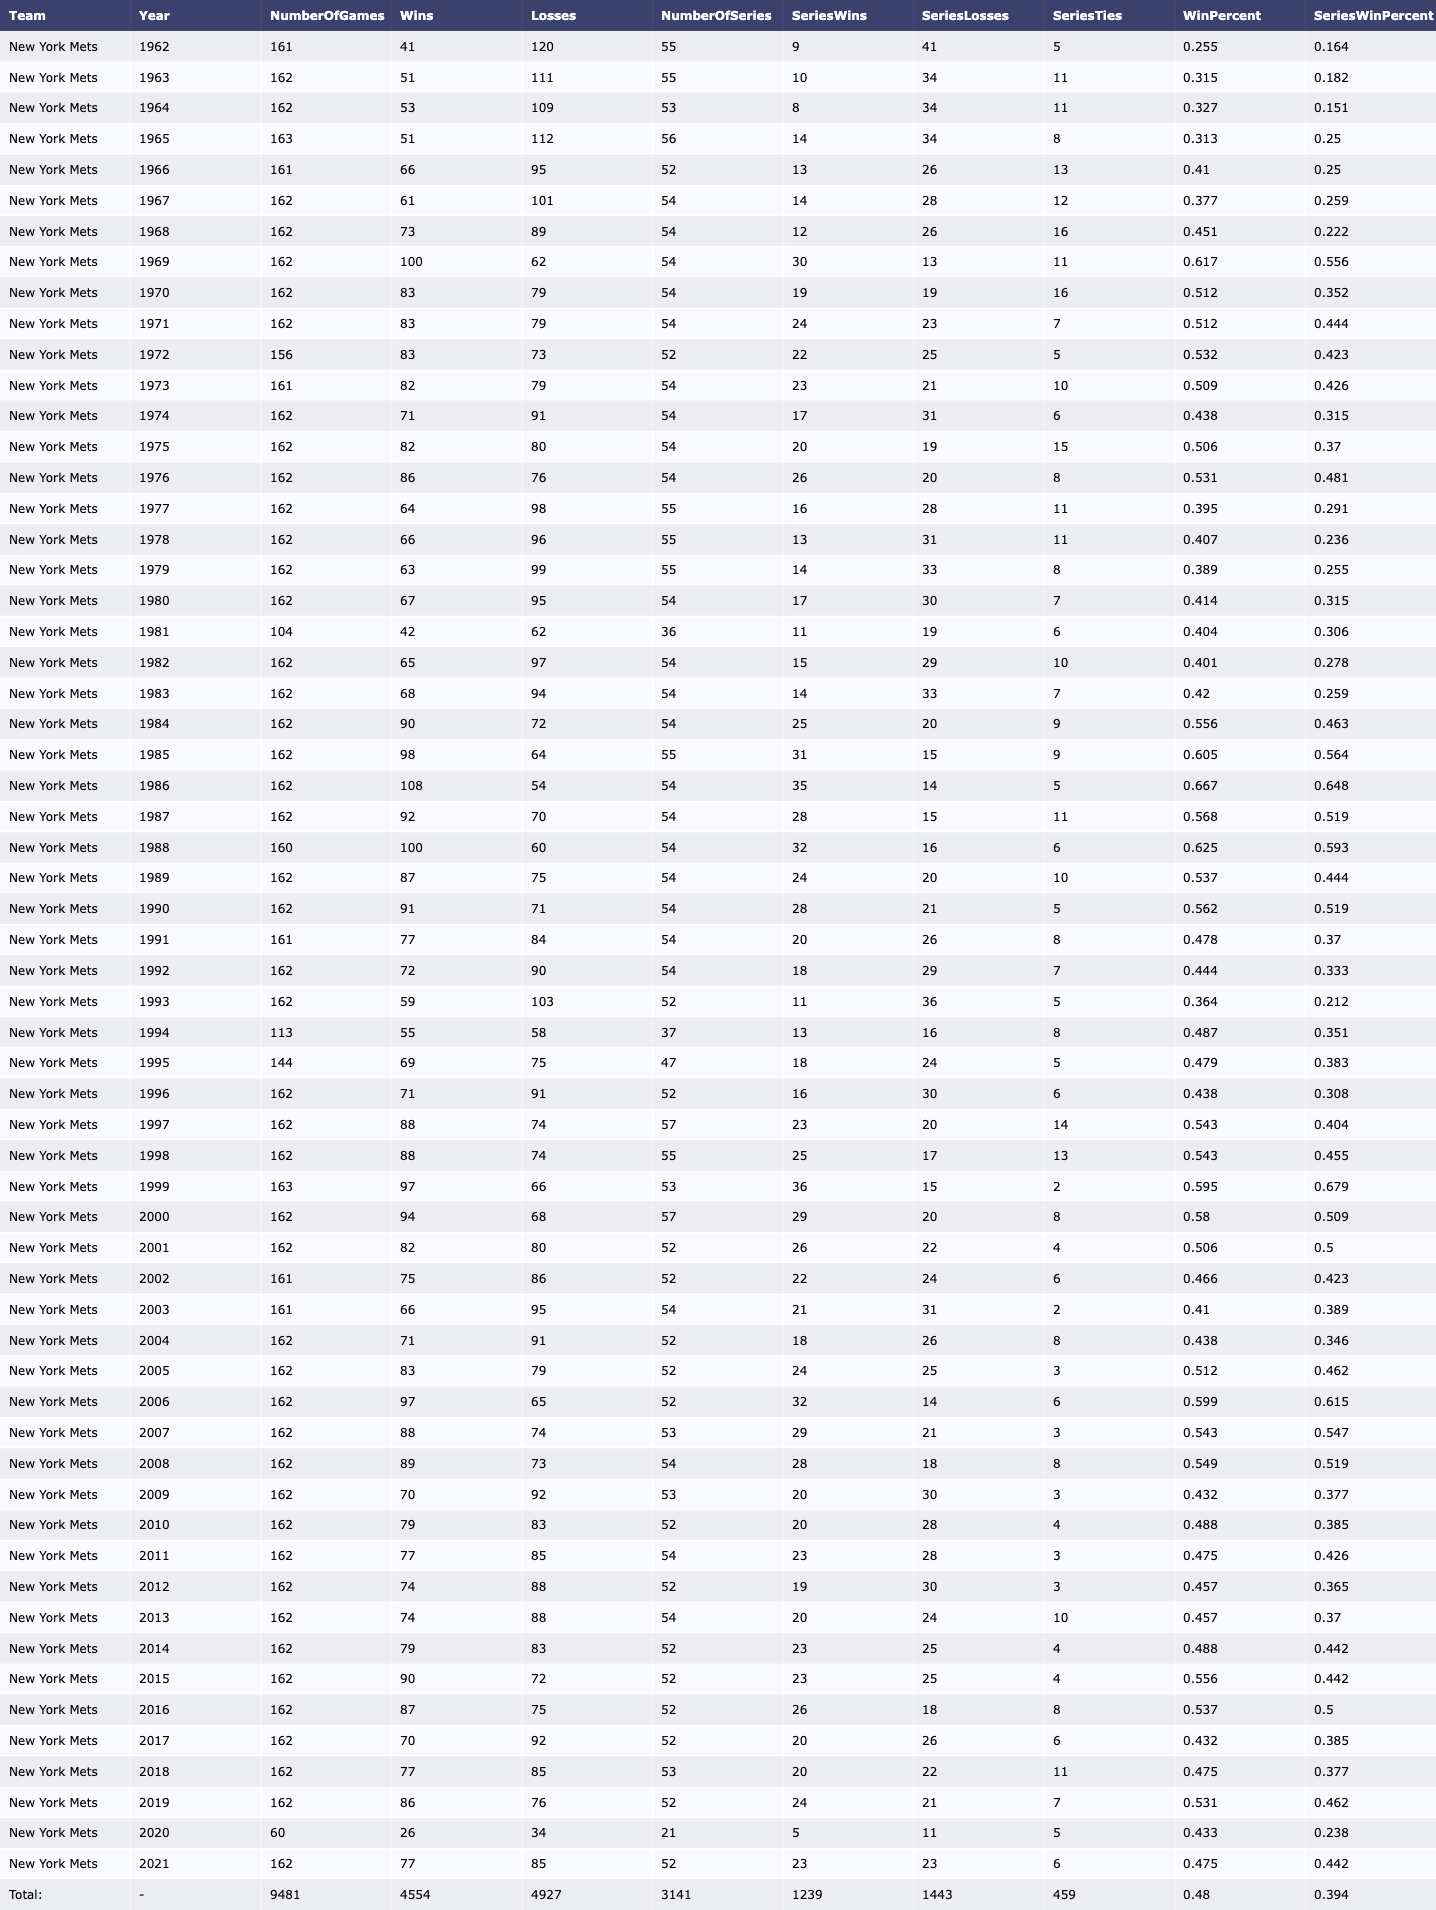

In [33]:
getTeamAndYears('New York Mets')

In [ ]:
getTeamAndYears('New York Mets', 2000, 2000)

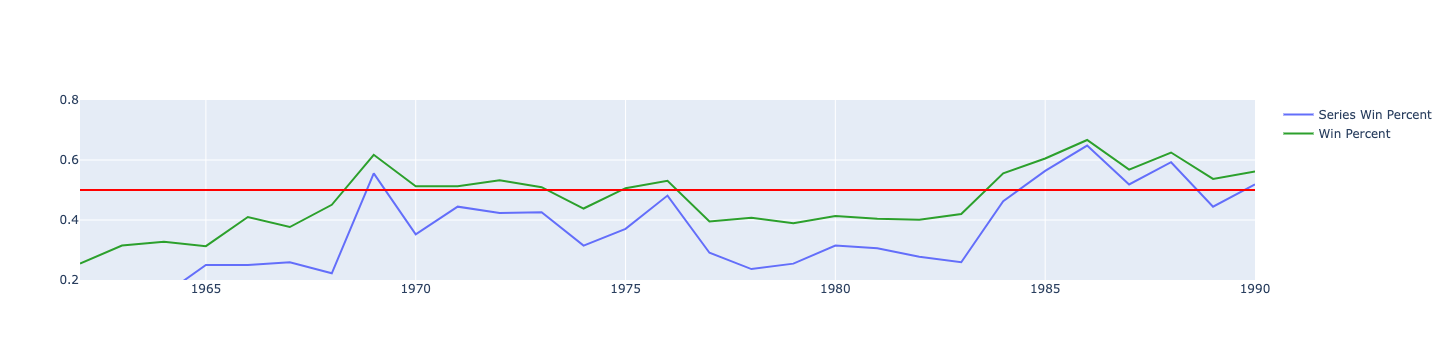

ValueError: cannot set a row with mismatched columns

In [75]:
getTeamAndYears('New York Mets', 1962, 1990)

In [ ]:
getTeamAndYears('New York Mets', 2000)

In [ ]:
#getTeamAndYears('New York Mets', 1942, 1945)
#Add year filter

In [ ]:
#getTeamAndYears('Mets', 1969)
#Add team filter

#### getTeamsAndYearsMultiName

In [ ]:
getTeamAndYearsMultiName('Oakland Athletics')
#Need to fix year logic

#### getOneYearPlayoffs

In [ ]:
getOneYearPlayoffs('New York Mets', 1965)

In [ ]:
getOneYearPlayoffs('New York Mets', 1960)
#Add different message for years out of bounds?

In [ ]:
getOneYearPlayoffs('New York Mets', 1986)

In [ ]:
getOneYearPlayoffs('New York Mets', 1994)

In [ ]:
getOneYearPlayoffs('New York Mets', 2006)

#### madePlayoffs

In [ ]:
madePlayoffs('New York Mets', 1986)

In [ ]:
madePlayoffs('New York Mets', 1950)
#Fix year filter

In [ ]:
madePlayoffs('New York Mets', 2021)

#### wonWorldSeries

In [ ]:
wonWorldSeries('New York Mets', 1969)

In [ ]:
wonWorldSeries('New York Mets', 1990)

In [ ]:
wonWorldSeries('New York Mets', 2000)

#### getOneYearRegularSeason

In [ ]:
getOneYearRegularSeason("New York Mets", 1962)

In [ ]:
getOneYearRegularSeason("New York Mets", 1905)

In [ ]:
getOneYearRegularSeason("New York Mets", 2008)

In [ ]:
getOneYearRegularSeason("Mets", 1996)

#### getOneYearResultsFull

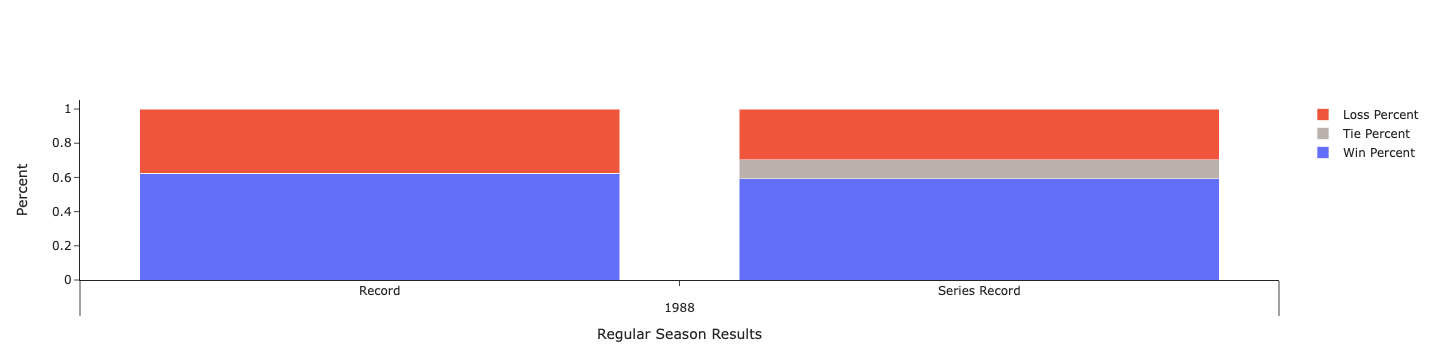

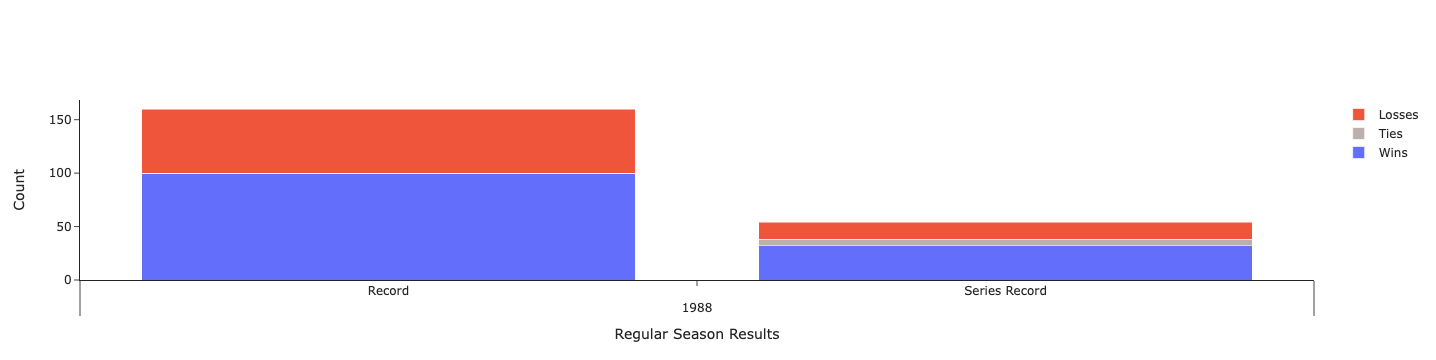

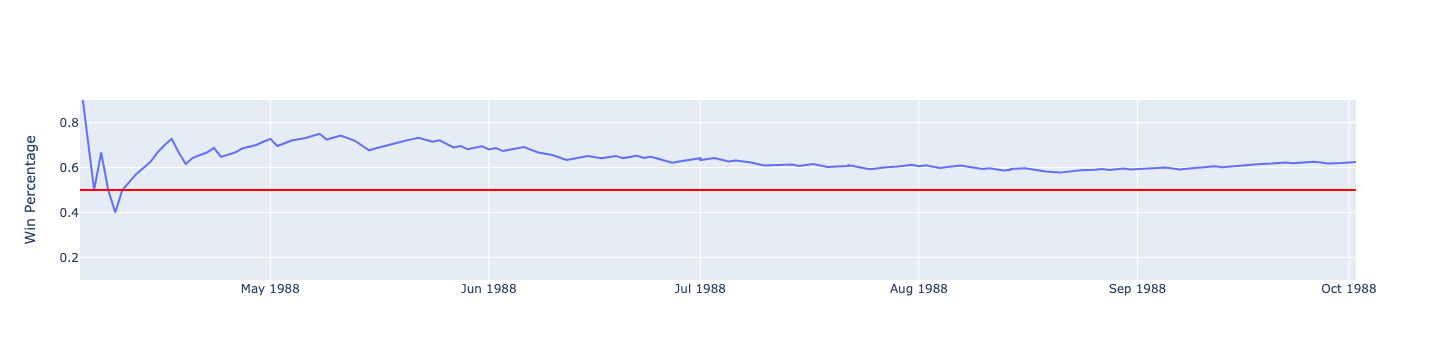

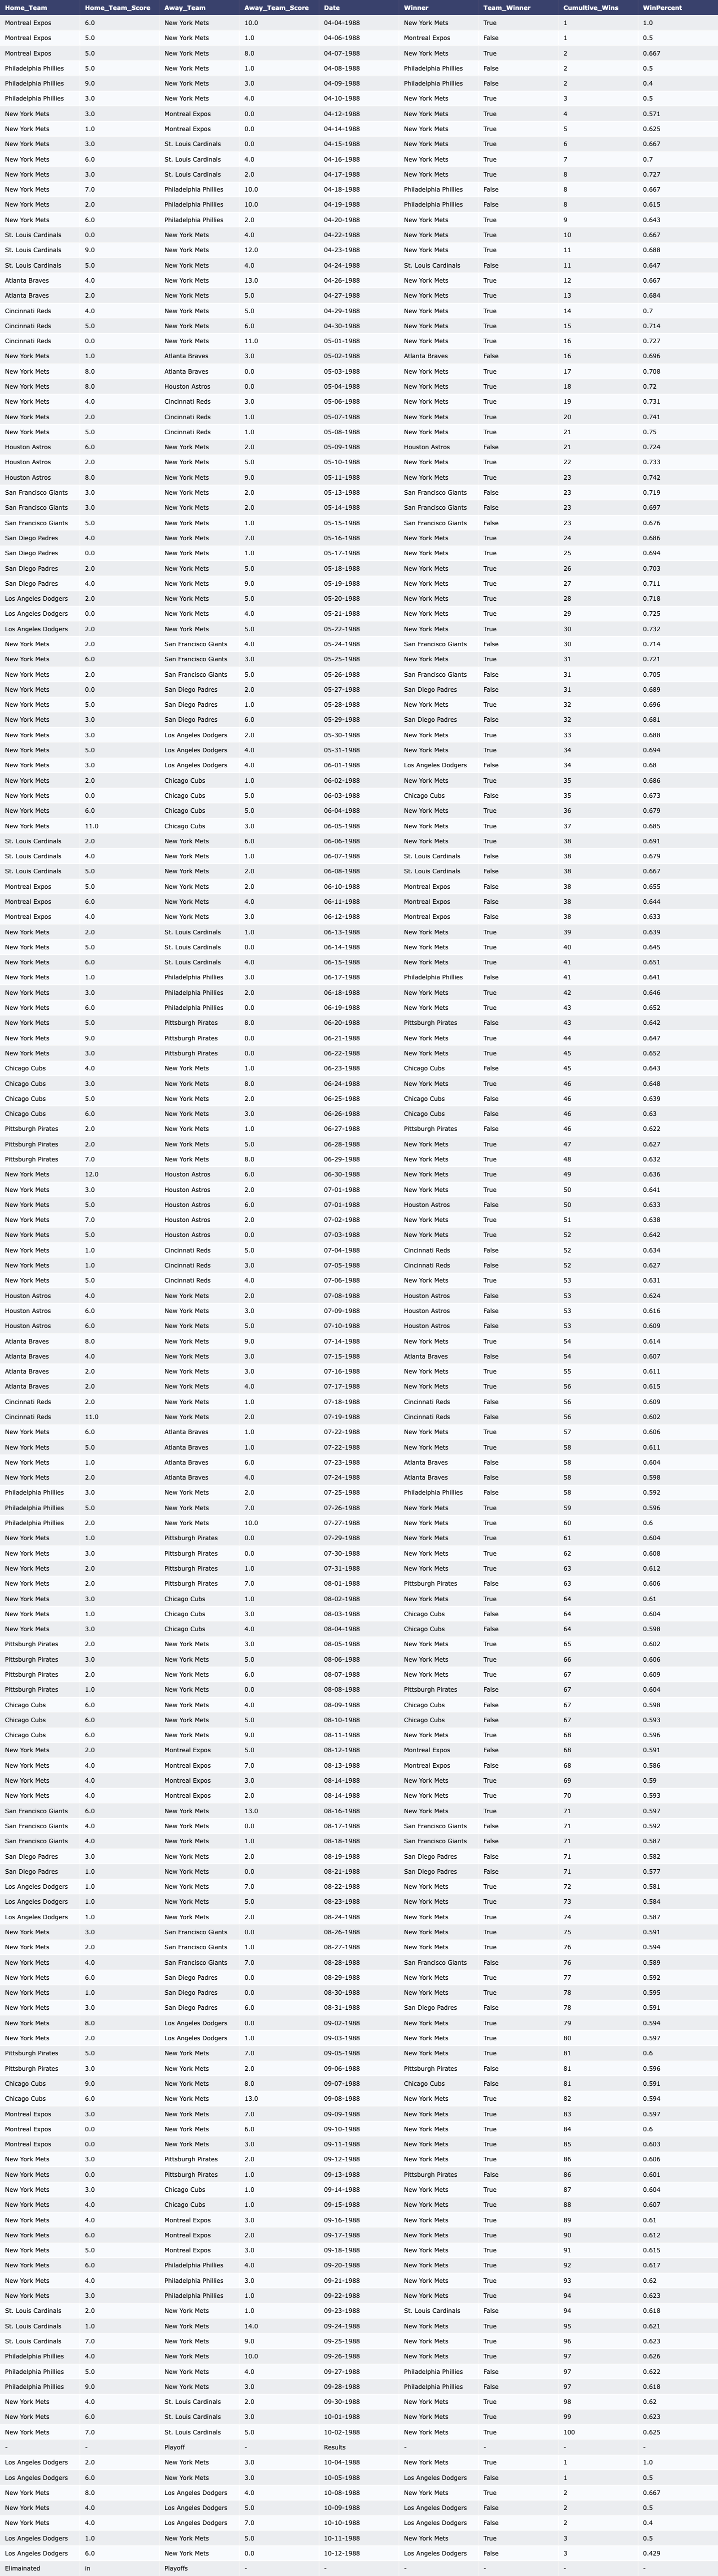

In [34]:
getOneYearResultsFull('New York Mets', 1988)

In [ ]:
getOneYearResultsFull('New York Mets', 1962)

In [ ]:
getOneYearResultsFull('New York Mets', 1986)

### Dashboard/Graphics

In [ ]:
#Results = getTeamAndYears('New York Mets')
#table = ff.create_table(Results)
#table

In [ ]:
TeamsAndYears[TeamsAndYears['Team'] == Team].Season_Min.iloc[0]

In [101]:
fig = getTeamAndYears('New York Mets', 1999, 1999)

In [104]:
import streamlit as st
import pandas as pd
import plotly.express as px




st.plotly_chart(fig)



DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

## Add Playoffs and World Series Result to master DF

In [36]:
MasterYearlyResults['MadePostSeason'] = np.NaN
MasterYearlyResults['WonWorldSeries'] = np.NaN
MasterYearlyResults

Unnamed: 0                 Team  Year  NumberOfGames  Wins  Losses  \
0              0       Anaheim Angels  1997            162    84      78   
1              1       Anaheim Angels  1998            162    85      77   
2              2       Anaheim Angels  1999            162    70      92   
3              3       Anaheim Angels  2000            162    82      80   
4              4       Anaheim Angels  2001            162    75      87   
...          ...                  ...   ...            ...   ...     ...   
2605        2605  Washington Senators  1967            161    76      85   
2606        2606  Washington Senators  1968            161    65      96   
2607        2607  Washington Senators  1969            162    86      76   
2608        2608  Washington Senators  1970            162    70      92   
2609        2609  Washington Senators  1971            159    64      95   

      NumberOfSeries  SeriesWins  SeriesLosses  SeriesTies  WinPercent  \
0                 60          23            21          16    0.518519   
1                 58          25            20          13    0.524691   
2                 52          19            29           4    0.432099   
3                 52          21            20          11    0.506173   
4                 53          24            27           2    0.462963   
...              ...         ...           ...         ...         ...   
2605              55          18            24          13    0.472050   
2606              55          15            27          13    0.403727   
2607              54          26            19           9    0.530864   
2608              55          20            28           7    0.432099   
2609              55          19            27           9    0.402516   

      SeriesWinPercent  MadePostSeason  WonWorldSeries  
0             0.383333             NaN             NaN  
1             0.431034             NaN             NaN  
2             0.365385             NaN             NaN  
3             0.403846             NaN             NaN  
4             0.452830             NaN             NaN  
...                ...             ...             ...  
2605          0.327273             NaN             NaN  
2606          0.272727             NaN             NaN  
2607          0.481481             NaN             NaN  
2608          0.363636             NaN             NaN  
2609          0.345455             NaN             NaN  

[2610 rows x 14 columns]

In [37]:
for x in range(len(MasterYearlyResults)):
    MasterYearlyResults['MadePostSeason'].iloc[x] = madePlayoffs(MasterYearlyResults.Team.iloc[x], MasterYearlyResults.Year.iloc[x])
    MasterYearlyResults['WonWorldSeries'].iloc[x] = wonWorldSeries(MasterYearlyResults.Team.iloc[x], MasterYearlyResults.Year.iloc[x])

No Playoffs in year selected
No Playoffs in year selected
No Playoffs in year selected
No Playoffs in year selected
No Playoffs in year selected
No Playoffs in year selected
No Playoffs in year selected
No Playoffs in year selected
No Playoffs in year selected
No Playoffs in year selected
No Playoffs in year selected
No Playoffs in year selected
No Playoffs in year selected
No Playoffs in year selected
No Playoffs in year selected
No Playoffs in year selected
No Playoffs in year selected
No Playoffs in year selected
No Playoffs in year selected
No Playoffs in year selected
No Playoffs in year selected
No Playoffs in year selected
No Playoffs in year selected
No Playoffs in year selected
No Playoffs in year selected
No Playoffs in year selected
No Playoffs in year selected
No Playoffs in year selected
No Playoffs in year selected
No Playoffs in year selected
No Playoffs in year selected
No Playoffs in year selected
No Playoffs in year selected
No Playoffs in year selected
No Playoffs in

In [38]:
MasterYearlyResults[MasterYearlyResults['Team'] == 'Boston Red Sox'].tail(25)

Unnamed: 0            Team  Year  NumberOfGames  Wins  Losses  \
308         308  Boston Red Sox  1997            162    78      84   
309         309  Boston Red Sox  1998            162    92      70   
310         310  Boston Red Sox  1999            162    94      68   
311         311  Boston Red Sox  2000            162    85      77   
312         312  Boston Red Sox  2001            161    82      79   
313         313  Boston Red Sox  2002            162    93      69   
314         314  Boston Red Sox  2003            162    95      67   
315         315  Boston Red Sox  2004            162    98      64   
316         316  Boston Red Sox  2005            162    95      67   
317         317  Boston Red Sox  2006            162    86      76   
318         318  Boston Red Sox  2007            162    96      66   
319         319  Boston Red Sox  2008            162    95      67   
320         320  Boston Red Sox  2009            162    95      67   
321         321  Boston Red Sox  2010            162    89      73   
322         322  Boston Red Sox  2011            162    90      72   
323         323  Boston Red Sox  2012            162    69      93   
324         324  Boston Red Sox  2013            162    97      65   
325         325  Boston Red Sox  2014            162    71      91   
326         326  Boston Red Sox  2015            162    78      84   
327         327  Boston Red Sox  2016            162    93      69   
328         328  Boston Red Sox  2017            162    93      69   
329         329  Boston Red Sox  2018            162   108      54   
330         330  Boston Red Sox  2019            162    84      78   
331         331  Boston Red Sox  2020             60    24      36   
332         332  Boston Red Sox  2021            162    92      70   

     NumberOfSeries  SeriesWins  SeriesLosses  SeriesTies  WinPercent  \
308              57          21            24          12    0.481481   
309              58          28            16          14    0.567901   
310              52          29            18           5    0.580247   
311              54          24            21           9    0.524691   
312              53          24            25           4    0.509317   
313              52          25            19           8    0.574074   
314              53          27            19           7    0.586420   
315              53          31            14           8    0.604938   
316              53          28            19           6    0.586420   
317              53          26            22           5    0.530864   
318              53          33            14           6    0.592593   
319              52          32            17           3    0.586420   
320              52          29            19           4    0.586420   
321              52          28            17           7    0.549383   
322              52          27            20           5    0.555556   
323              52          20            28           4    0.425926   
324              53          33            17           3    0.598765   
325              52          21            26           5    0.438272   
326              52          25            21           6    0.481481   
327              53          26            17          10    0.574074   
328              54          29            18           7    0.574074   
329              52          33            12           7    0.666667   
330              52          23            23           6    0.518519   
331              20           6             8           6    0.400000   
332              53          27            19           7    0.567901   

     SeriesWinPercent MadePostSeason WonWorldSeries  
308          0.368421          False          False  
309          0.482759           True          False  
310          0.557692           True          False  
311          0.444444          False          False  
312          0.

In [39]:
MasterYearlyResults[MasterYearlyResults['WonWorldSeries'] == True].sort_values(by = 'WinPercent').head(40)

Unnamed: 0                   Team  Year  NumberOfGames  Wins  Losses  \
2062        2062      Pittsburgh Rebels  1914            150    65      85   
2385        2385    St. Louis Cardinals  2006            161    83      78   
1401        1401        Minnesota Twins  1987            162    85      77   
1687        1687       New York Yankees  2000            161    87      74   
2173        2173   San Francisco Giants  2014            162    88      74   
87            87         Atlanta Braves  2021            161    88      73   
158          158    Baltimore Terrapins  1914            153    84      69   
1716        1716      Oakland Athletics  1974            162    90      72   
2390        2390    St. Louis Cardinals  2011            162    90      72   
1177        1177     Kansas City Royals  1985            162    91      71   
763          763        Cincinnati Reds  1990            162    91      71   
1898        1898  Philadelphia Phillies  1980            162    91      71   
1076        1076        Florida Marlins  2003            162    91      71   
1236        1236    Los Angeles Dodgers  1959            156    88      68   
1926        1926  Philadelphia Phillies  2008            162    92      70   
1683        1683       New York Yankees  1996            162    92      70   
1070        1070        Florida Marlins  1997            162    92      70   
2169        2169   San Francisco Giants  2010            162    92      70   
11            11   Arizona Diamondbacks  2001            162    92      70   
2361        2361    St. Louis Cardinals  1982            162    92      70   
1258        1258    Los Angeles Dodgers  1981            110    63      47   
2343        2343    St. Louis Cardinals  1964            162    93      69   
2536        2536   Washington Nationals  2019            162    93      69   
2305        2305    St. Louis Cardinals  1926            154    89      65   
2171        2171   San Francisco Giants  2012            162    94      68   
1715        1715      Oakland Athletics  1973            162    94      68   
989          989         Detroit Tigers  1945            155    90      65   
2493        2493      Toronto Blue Jays  1993            162    95      67   
1265        1265    Los Angeles Dodgers  1988            162    95      67   
1207        1207     Kansas City Royals  2015            162    95      67   
1405        1405        Minnesota Twins  1991            162    95      67   
1649        1649       New York Yankees  1962            162    96      66   
318          318         Boston Red Sox  2007            162    96      66   
2492        2492      Toronto Blue Jays  1992            162    96      66   
227          227         Boston Red Sox  1916            155    92      63   
229          229         Boston Red Sox  1918            126    75      51   
1645        1645       New York Yankees  1958            154    92      62   
2562        2562    Washington Senators  1924            154    92      62   
2011        2011     Pittsburgh Pirates  1971            162    97      65   
1242        1242    Los Angeles Dodgers  1965            162    97      65   

      NumberOfSeries  SeriesWins  SeriesLosses  SeriesTies  WinPercent  \
2062              50          17            24           9    0.433333   
2385              52          29            21           2    0.515528   
1401              52          25            23           4    0.524691   
1687              55          28            17          10    0.540373   
2173              52          29            20           3    0.543210   
87                52          27            18           7    0.546584   
158               45          23            16           6    0.549020   
1716              54          25            19          10    0.555556   
2390              52          31            18           3    0.555556   
1177              53          33            15           5    0.561

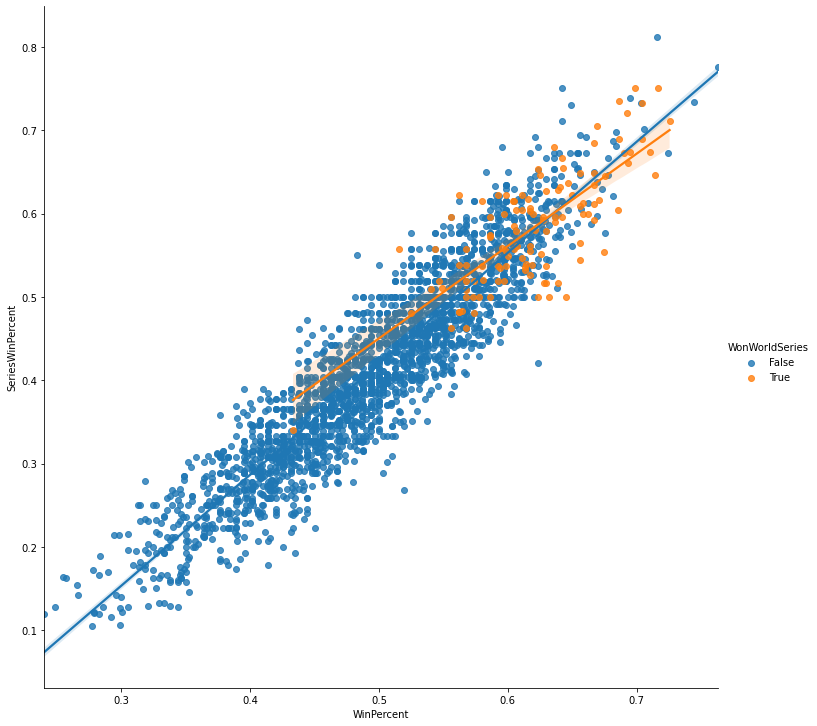

In [40]:
#plt.figure(figsize = (12,12))
sns.lmplot(x="WinPercent", y="SeriesWinPercent", data=MasterYearlyResults, hue = "WonWorldSeries" , height = 10, aspect = 1)

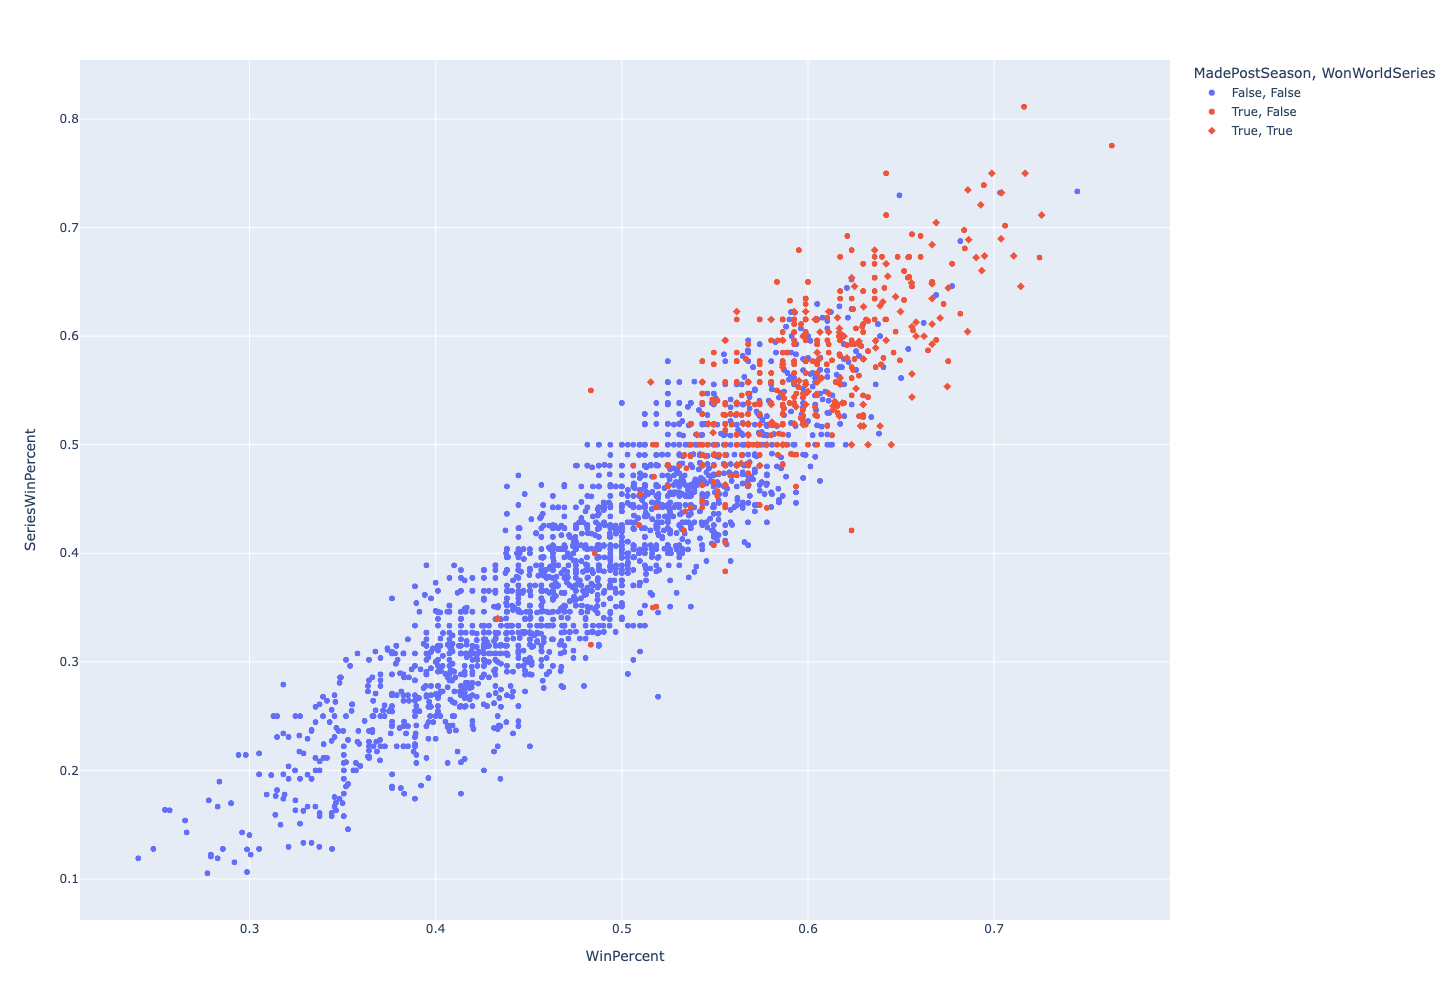

<Figure size 1008x1008 with 0 Axes>

In [65]:
plt.figure(figsize = (14,14))
#sns.scatterplot(x=, y="SeriesWinPercent", data=, hue = "MadePostSeason", style = 'WonWorldSeries')

fig = px.scatter(MasterYearlyResults, x="WinPercent", y="SeriesWinPercent", color = "MadePostSeason", symbol ="WonWorldSeries" , width = 1400, height =1000,
                hover_data=["Team", "Year"])

fig.show()

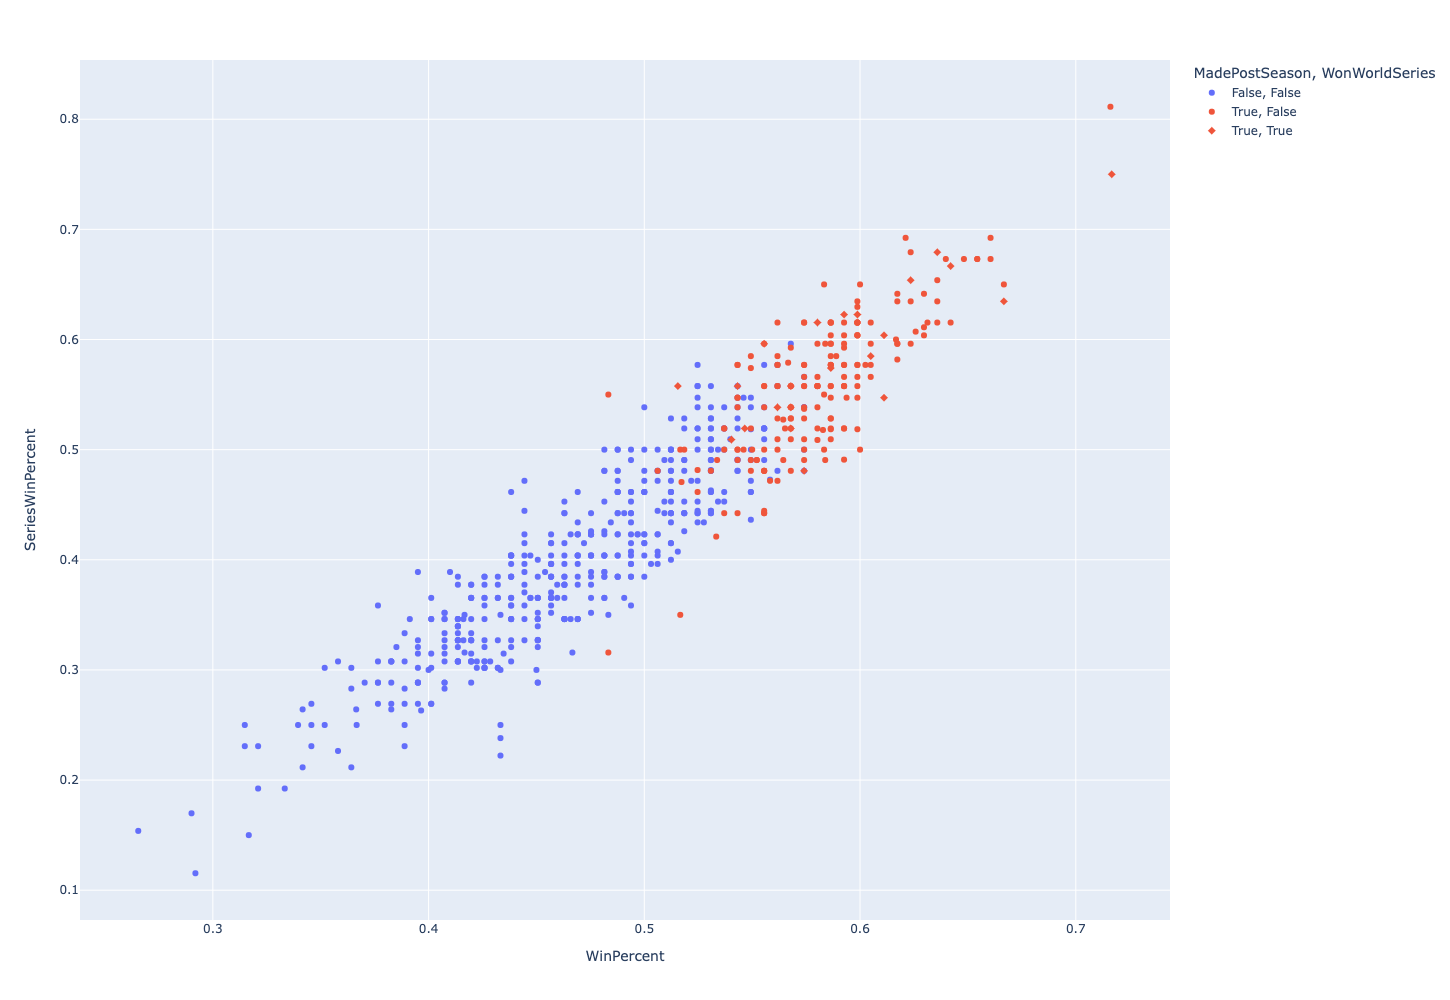

In [68]:
data = MasterYearlyResults[MasterYearlyResults['Year'] > 1999]
fig = px.scatter(data, x="WinPercent", y="SeriesWinPercent", color = "MadePostSeason", symbol ="WonWorldSeries" , width = 1400, height =1000,
                hover_data=["Team", "Year"])
fig.show()